In [33]:
from src.train import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Lo primero, he creado un dataset con diferentes fondos y condiciones de iluminación para que pudiera reconocerlo la webcam grabando videos y creado imagenes. Las funciones utilizadas están en data.py


In [34]:
#Paths
trainPath='INPUT/rps/'

### Data Generators

In [35]:
batch_size = 32

In [36]:
generator = ImageDataGenerator(rescale=1./255,
      rotation_range=15,
      width_shift_range=0.1,
      height_shift_range=0.1,
      horizontal_flip=True,
      zoom_range=0.1,
      fill_mode='nearest',
      validation_split = 0.15) 


trainGen= generator.flow_from_directory(trainPath,target_size=(106, 68),batch_size=batch_size,class_mode='categorical') 

validationGen = generator.flow_from_directory(trainPath,target_size=(106, 68),batch_size=batch_size,class_mode='categorical',shuffle=False, subset = 'validation')



Found 11390 images belonging to 3 classes.
Found 1706 images belonging to 3 classes.


In [37]:
trainGen.labels

array([0, 0, 0, ..., 2, 2, 2], dtype=int32)

In [38]:
steps_per_epoch = trainGen.samples // trainGen.batch_size
validsteps = validationGen.samples// validationGen.batch_size
print(steps_per_epoch,validsteps)

355 53


In [39]:
sample_training_images, labels = next(trainGen)

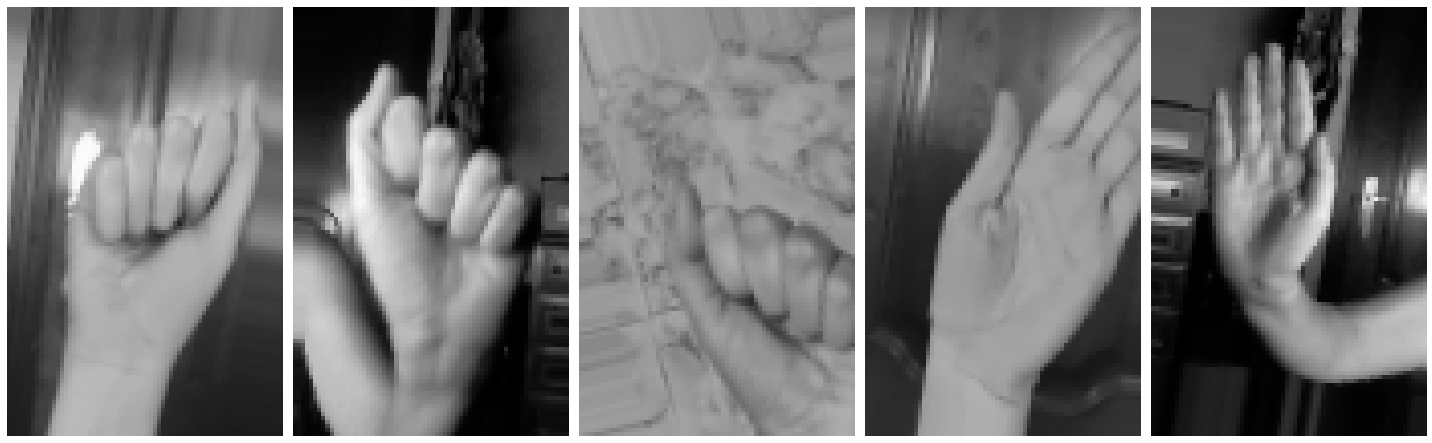

[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [40]:
plotImages(sample_training_images[:5])
print(labels[:5])

# TRAIN

He entrenado varios modelos, primero creados y ajustados por mi y luego escogiendo modelos entrenados para probar la eficiencia de cada modelo.

In [9]:
model = model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 102, 64, 64)       4864      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 51, 32, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 51, 32, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 28, 64)        102464    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 14, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 10, 128)       2

In [10]:
optimizer=get_optimizer(0.001,steps_per_epoch)

In [23]:
history=fit(model,trainGen,validationGen,optimizer,steps_per_epoch,15,validsteps)

Epoch 1/15
355/355 [==============================] - 127s 357ms/step - loss: 0.9922 - accuracy: 0.4645 - val_loss: 0.5857 - val_accuracy: 0.7300
Epoch 2/15
355/355 [==============================] - 130s 366ms/step - loss: 0.2533 - accuracy: 0.9089 - val_loss: 0.0426 - val_accuracy: 0.9864
Epoch 3/15
355/355 [==============================] - 134s 378ms/step - loss: 0.0779 - accuracy: 0.9738 - val_loss: 0.0376 - val_accuracy: 0.9876
Epoch 4/15
355/355 [==============================] - 128s 361ms/step - loss: 0.0482 - accuracy: 0.9846 - val_loss: 0.0416 - val_accuracy: 0.9900
Epoch 5/15
355/355 [==============================] - 126s 354ms/step - loss: 0.0348 - accuracy: 0.9894 - val_loss: 0.0138 - val_accuracy: 0.9923
Epoch 6/15
355/355 [==============================] - 135s 380ms/step - loss: 0.0322 - accuracy: 0.9897 - val_loss: 0.0313 - val_accuracy: 0.9882
Epoch 7/15
355/355 [==============================] - 140s 395ms/step - loss: 0.0252 - accuracy: 0.9921 - val_loss: 0.0103 -

In [24]:
model.save("model.h5")

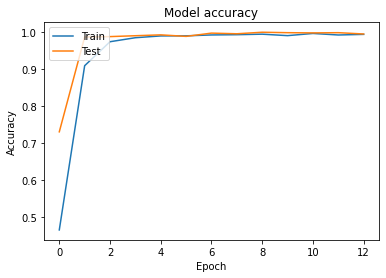

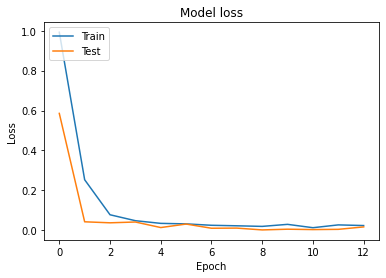

In [25]:
plot(history)

Classification Report
              precision    recall  f1-score   support

       paper       1.00      1.00      1.00       594
        rock       1.00      1.00      1.00       552
    scissors       0.99      1.00      1.00       560

    accuracy                           1.00      1706
   macro avg       1.00      1.00      1.00      1706
weighted avg       1.00      1.00      1.00      1706

Confusion Matrix
[[592   0   2]
 [  0 551   1]
 [  0   1 559]]


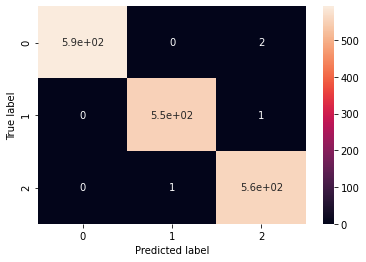

In [19]:
classReport(model,validationGen,validsteps)

### Usando modelos pre-entrenados

# DENSENET121

In [27]:
modeldense= modelDenseNet121()
modeldense.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 106, 68, 3)] 0                                            
__________________________________________________________________________________________________
zero_padding2d_2 (ZeroPadding2D (None, 112, 74, 3)   0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 53, 34, 64)   9408        zero_padding2d_2[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 53, 34, 64)   256         conv1/conv[0][0]                 
_______________________________________________________________________________________

In [28]:
optimizer=get_optimizer(0.0001, steps_per_epoch)
history=fit(modeldense,trainGen,validationGen,optimizer,steps_per_epoch,6,validsteps)

Epoch 1/6
355/355 [==============================] - 411s 1s/step - loss: 0.1412 - accuracy: 0.9537 - val_loss: 0.0095 - val_accuracy: 0.9971
Epoch 2/6
355/355 [==============================] - 429s 1s/step - loss: 0.0079 - accuracy: 0.9972 - val_loss: 9.2975e-04 - val_accuracy: 1.0000
Epoch 3/6
355/355 [==============================] - 408s 1s/step - loss: 0.0038 - accuracy: 0.9987 - val_loss: 2.7198e-04 - val_accuracy: 1.0000
Epoch 4/6
355/355 [==============================] - 425s 1s/step - loss: 0.0023 - accuracy: 0.9992 - val_loss: 2.7506e-04 - val_accuracy: 1.0000
Epoch 5/6
355/355 [==============================] - 429s 1s/step - loss: 0.0017 - accuracy: 0.9996 - val_loss: 0.0012 - val_accuracy: 0.9994
Epoch 6/6
54/54 [==============================] - 11s 205ms/step - loss: 4.1793e-05 - accuracy: 1.0000
Test loss: =  4.1793093259911984e-05
Test accuracy =  1.0


In [29]:
modeldense.save("modelDense.h5")

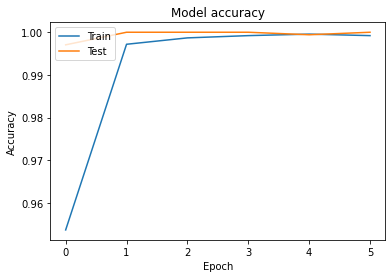

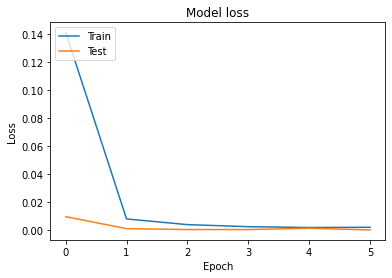

In [30]:
plot(history)

Classification Report
              precision    recall  f1-score   support

       paper       1.00      1.00      1.00       594
        rock       1.00      1.00      1.00       552
    scissors       1.00      1.00      1.00       560

    accuracy                           1.00      1706
   macro avg       1.00      1.00      1.00      1706
weighted avg       1.00      1.00      1.00      1706

Confusion Matrix
[[594   0   0]
 [  0 552   0]
 [  0   0 560]]


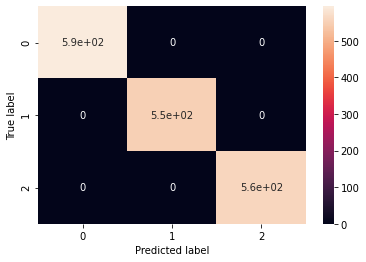

In [17]:
classReport(modeldense,validationGen,validsteps)

# RESNET50

In [44]:
modelRN50= modelResNet50()
modelRN50.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 106, 68, 3)]      0         
_________________________________________________________________
resnet101 (Functional)       (None, 4, 3, 2048)        42658176  
_________________________________________________________________
flatten_2 (Flatten)          (None, 24576)             0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 24576)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 73731     
Total params: 42,731,907
Trainable params: 42,626,563
Non-trainable params: 105,344
_________________________________________________________________


In [45]:
#optimizer=Adam(learning_rate=0.0001)
optimizer=get_optimizer(0.0001, steps_per_epoch)
history=fit(modelRN50,trainGen,validationGen,optimizer,steps_per_epoch,9,validsteps)


Epoch 1/9
355/355 [==============================] - 825s 2s/step - loss: 0.0962 - accuracy: 0.9710 - val_loss: 45.8582 - val_accuracy: 0.3255
Epoch 2/9
355/355 [==============================] - 825s 2s/step - loss: 0.0069 - accuracy: 0.9980 - val_loss: 8.8194 - val_accuracy: 0.4900
Epoch 3/9
355/355 [==============================] - 825s 2s/step - loss: 0.0151 - accuracy: 0.9965 - val_loss: 1.5125 - val_accuracy: 0.8567
Epoch 4/9
355/355 [==============================] - 825s 2s/step - loss: 0.0117 - accuracy: 0.9968 - val_loss: 6.0866e-04 - val_accuracy: 1.0000
Epoch 5/9
355/355 [==============================] - 841s 2s/step - loss: 0.0015 - accuracy: 0.9995 - val_loss: 0.0083 - val_accuracy: 0.9982
Epoch 6/9
355/355 [==============================] - 823s 2s/step - loss: 0.0018 - accuracy: 0.9996 - val_loss: 0.0046 - val_accuracy: 0.9982
Epoch 7/9
355/355 [==============================] - 828s 2s/step - loss: 0.0099 - accuracy: 0.9977 - val_loss: 2.9160e-04 - val_accuracy: 1.00

In [46]:
modelRN50.save("modelRN50.h5")

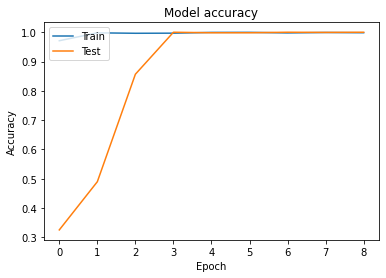

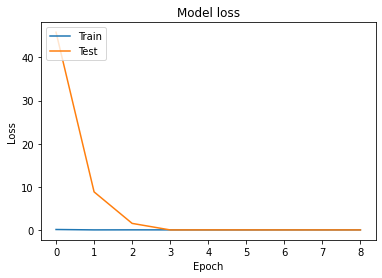

In [47]:
plot(history)

Classification Report
              precision    recall  f1-score   support

       paper       1.00      1.00      1.00       594
        rock       1.00      1.00      1.00       552
    scissors       1.00      1.00      1.00       560

    accuracy                           1.00      1706
   macro avg       1.00      1.00      1.00      1706
weighted avg       1.00      1.00      1.00      1706

Confusion Matrix
[[594   0   0]
 [  0 552   0]
 [  0   0 560]]


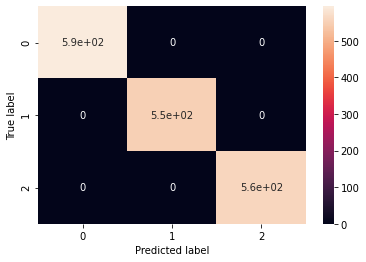

In [48]:
classReport(modelRN50,validationGen,validsteps)

# GRAYSCALE TRAIN

In [49]:
batch_size = 32

generator = ImageDataGenerator(rescale=1./255,rotation_range=15,width_shift_range=0.1,height_shift_range=0.1,
      horizontal_flip=True,zoom_range=0.1,fill_mode='nearest',validation_split = 0.15) 


trainGen= generator.flow_from_directory(trainPath,target_size=(106, 68),batch_size=batch_size,class_mode='categorical',color_mode='grayscale') 

validationGen = generator.flow_from_directory(trainPath,target_size=(106, 68),batch_size=batch_size,class_mode='categorical',shuffle=False, subset = 'validation',color_mode='grayscale')
color_mode='grayscale'

Found 11390 images belonging to 3 classes.
Found 1706 images belonging to 3 classes.


In [50]:
modelGray = modelGray()

In [51]:
#optimizer= "adam"
history=fit(modelGray,trainGen,validationGen,optimizer,steps_per_epoch,7,validsteps)

Epoch 1/7
355/355 [==============================] - 60s 169ms/step - loss: 0.8621 - accuracy: 0.5762 - val_loss: 0.4523 - val_accuracy: 0.8084
Epoch 2/7
355/355 [==============================] - 60s 169ms/step - loss: 0.4689 - accuracy: 0.8139 - val_loss: 0.2858 - val_accuracy: 0.9068
Epoch 3/7
355/355 [==============================] - 60s 169ms/step - loss: 0.2864 - accuracy: 0.8953 - val_loss: 0.2091 - val_accuracy: 0.9316
Epoch 4/7
355/355 [==============================] - 60s 169ms/step - loss: 0.2052 - accuracy: 0.9289 - val_loss: 0.1788 - val_accuracy: 0.9363
Epoch 5/7
355/355 [==============================] - 60s 169ms/step - loss: 0.1645 - accuracy: 0.9469 - val_loss: 0.1692 - val_accuracy: 0.9404
Epoch 6/7
355/355 [==============================] - 60s 170ms/step - loss: 0.1387 - accuracy: 0.9531 - val_loss: 0.0974 - val_accuracy: 0.9693
Epoch 7/7
54/54 [==============================] - 4s 76ms/step - loss: 0.1120 - accuracy: 0.9631
Test loss: =  0.11200356483459473
Test

In [52]:
modelGray.save("modelgray.h5")

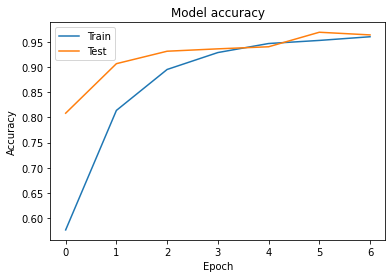

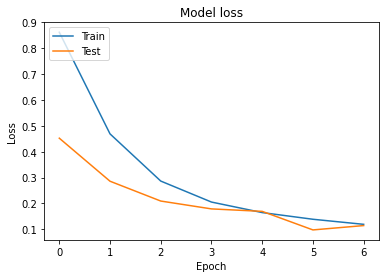

In [53]:
plot(history)

Classification Report
              precision    recall  f1-score   support

       paper       0.98      1.00      0.99       594
        rock       0.94      0.98      0.96       552
    scissors       0.99      0.92      0.95       560

    accuracy                           0.97      1706
   macro avg       0.97      0.97      0.97      1706
weighted avg       0.97      0.97      0.97      1706

Confusion Matrix
[[594   0   0]
 [  4 541   7]
 [  7  37 516]]


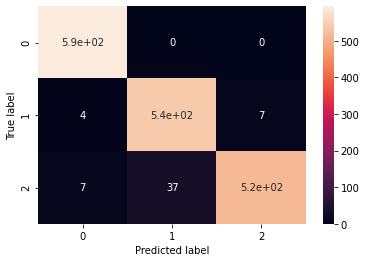

In [54]:
classReport(modelGray,validationGen,validsteps)

# RandomForestClassifier

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import model_selection
from tensorflow.keras.preprocessing import image
import pickle
from sklearn.model_selection import train_test_split
import glob

In [25]:
paper = glob.glob(trainPath+'paper/*.*')
rock = glob.glob(trainPath+'rock/*.*')
scissors = glob.glob(trainPath+'scissors/*.*')
classN=[paper,rock,scissors]
data = []
labels = []
for i in range(len(classN)):
    for e in classN[i]:   
        image=tensorflow.keras.preprocessing.image.load_img(e,color_mode='grayscale',target_size= (106,68))
        image=np.array(image)
        data.append(image)
        labels.append(i)
data = np.array(data)
labels = np.array(labels)

In [26]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(data, labels, test_size=0.15,random_state=7)

In [27]:
num_samples, nx, ny = X_train.shape
X_train = X_train.reshape((num_samples,nx*ny))

In [28]:
num_samples, nx, ny = X_test.shape
X_test = X_test.reshape((num_samples,nx*ny))

In [29]:
clf = RandomForestClassifier(max_depth=20, random_state=0).fit(X_train, y_train)
pred=clf.predict(X_test)
print(accuracy_score(y_test, pred))

0.9994148624926857


In [30]:
filename = 'modelRFC.sav'
pickle.dump(model, open(filename, 'wb'))

TypeError: cannot pickle '_thread.RLock' object

In [ ]:
loaded_model = pickle.load(open(filename, 'rb'))
#result = loaded_model.score(X_test, Y_test)
#print(result)

In [ ]:
conf_mat = confusion_matrix(y_test,pred)
sns.heatmap(conf_mat,annot=True)

In [ ]:
print('Classification Report')
print(classification_report(y_test,pred, target_names=["paper","rock","scissors"]))

 
 
 **Testing:**

In [4]:
img = cv2.resize(cv2.imread("INPUT/Tests/paper1.jpg"),(640,480))
img = img[28:452, 183:457]
img = cv2.resize(img,(106,68))
img = cv2.cvtColor(cv2.resize(img,(68,106)),cv2.COLOR_BGR2GRAY)
cv2.imwrite("INPUT/Tests/paper.jpg", img)              

True

In [5]:
img1 = cv2.resize(cv2.imread("INPUT/Tests/rock1.jpg"),(640,480))
img1 = img1[28:452, 183:457] 
img1 = cv2.cvtColor(cv2.resize(img1,(68,106)),cv2.COLOR_BGR2GRAY)
cv2.imwrite("INPUT/Tests/rock.jpg", img1)

True

In [16]:
img2=cv2.resize(cv2.imread("INPUT/Tests/scissors.jpg"),(640,480))
img2 = img2[28:452, 183:457]
img2 = cv2.cvtColor(cv2.resize(img2,(68,106)),cv2.COLOR_BGR2GRAY)
cv2.imwrite("INPUT/Tests/scissors.jpg", img2)

True

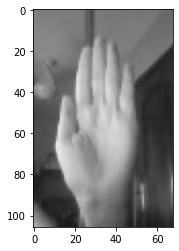

In [82]:
img=cv2.imread("INPUT/Tests/paper.jpg")
plt.imshow(img)

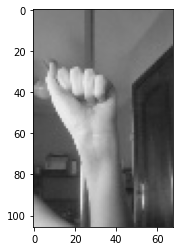

In [83]:
img1=cv2.imread("INPUT/Tests/rock.jpg")
plt.imshow(img1)

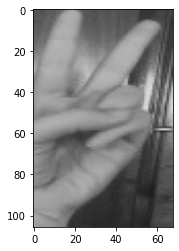

In [84]:
img2=cv2.imread("INPUT/Tests/scissors.jpg")
plt.imshow(img2)

In [85]:
model=load_model("model.h5")

In [86]:
pred = model.predict(np.array([img]))
print("Predicted P:",pred)
pred1 = model.predict(np.array([img1]))
print("Predicted R:",pred1)
pred2 = model.predict(np.array([img2]))
print("Predicted S:",pred2)

Predicted P: [[1. 0. 0.]]
Predicted R: [[0. 1. 0.]]
Predicted S: [[0. 0. 1.]]
